# Final Project: LSTM

# Importing Python Libraries

In [14]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

# Load dataset

In [6]:
dataset = pd.read_csv("AAPL.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2023,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
1,1/5/2023,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2,1/6/2023,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
3,1/9/2023,130.470001,133.410004,129.889999,130.149994,129.426575,70790800
4,1/10/2023,130.259995,131.259995,128.119995,130.729996,130.003342,63896200
...,...,...,...,...,...,...,...
233,12/7/2023,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
234,12/8/2023,194.199997,195.990005,193.669998,195.710007,195.710007,53377300
235,12/11/2023,193.110001,193.490005,191.419998,193.179993,193.179993,60943700
236,12/12/2023,193.080002,194.720001,191.720001,194.710007,194.710007,52696900


# Train Sets Split and Data Normalization

In [11]:
# Extracting the features and labels from the dataset 
training_set= dataset.iloc[:,1:2].values
print(training_set.shape)
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
X_train = []
Y_train = []
for i in range(60,238):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train= np.array(X_train)
Y_train= np.array(Y_train)

(238, 1)


In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(178, 60, 1)

# LSTM

In [15]:

def my_LSTM_Model():

    model = Sequential([
        LSTM(units=50, return_sequences =True,input_shape = (X_train.shape[1],1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences =True),
        Dropout(0.2),
        LSTM(units=50, return_sequences =True),
        Dropout(0.2),
        LSTM(units=50, return_sequences =True),
        Dropout(0.2),
        Dense(1)  
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [16]:
model = my_LSTM_Model()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)           

In [17]:
my_batch_size = 32
my_epochs = 50

history = model.fit(X_train, Y_train,
                    batch_size=my_batch_size, epochs=my_epochs)

Epoch 1/50

6/6 [==============================] - 7s 60ms/step - loss: 0.3574
Epoch 2/50
6/6 [==============================] - 0s 58ms/step - loss: 0.1586
Epoch 3/50
6/6 [==============================] - 0s 55ms/step - loss: 0.1206
Epoch 4/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0950
Epoch 5/50
6/6 [==============================] - 0s 55ms/step - loss: 0.0815
Epoch 6/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0751
Epoch 7/50
6/6 [==============================] - 0s 57ms/step - loss: 0.0670
Epoch 8/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0614
Epoch 9/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0576
Epoch 10/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0551
Epoch 11/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0524
Epoch 12/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0500
Epoch 13/50
6/6 [==============================] - 0s 56ms/s

In [23]:
testData= pd.read_csv("META.csv")
actual_stock_price = testData.iloc[:,1:2].values

totalData = pd.concat((dataset['Open'],testData['Open']),axis=0)
inputs = totalData[len(totalData)-len(testData)-60:].values

inputs = inputs.reshape(-1,1)
iputs = scaler.transform(inputs)

X_test = []
for i in range (60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [32]:
predictedStockPrice = model.predict(X_test)
predictedStockPrice = predictedStockPrice.reshape(-1, 1)
predictedStockPrice = scaler.inverse_transform(predictedStockPrice)


1/1 [==============================] - 0s 42ms/step


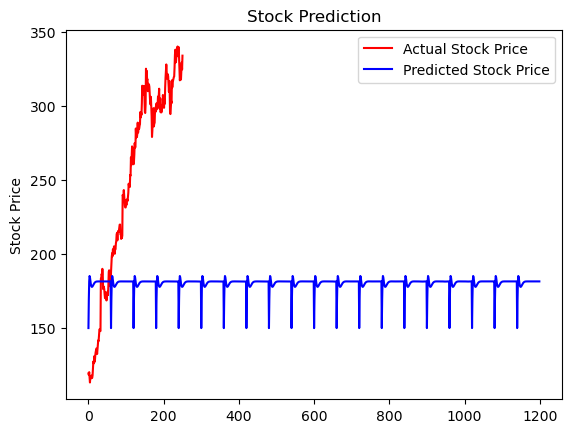

In [33]:
plt.plot(actual_stock_price, color = 'red', label = "Actual Stock Price")
plt.plot(predictedStockPrice_inversed , color = 'blue', label = "Predicted Stock Price")
plt.title("Stock Prediction")
plt.ylabel('Stock Price')
plt.legend()